<a href="https://colab.research.google.com/github/mluthfirahman/UAS_DATA-MINING/blob/main/UAS_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Proyek Akhir/UAS

##### Anggota Kelompok:
##### Muhammad Luthfi Rahman - 1402020061
##### Heru Prayogo - 1402020021
#####Miftahul Ridwan Riziq - 1402020025
##### Khairan Ghithrif - 1402020058

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install datacompy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
import datacompy

In [ ]:
import pandas as pd
path1 = "/content/drive/MyDrive/data/eReaderAdoption-Scoring.csv"
path2 = "/content/drive/MyDrive/data/eReaderAdoption-Training.csv"
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

## Business Understanding

In [ ]:
compare = datacompy.Compare(
df1,
df2,
join_columns='User_ID',  #You can also specify a list of columns eg ['policyID','statecode']
abs_tol=0, #Optional, defaults to 0
rel_tol=0, #Optional, defaults to 0
df1_name='Original', #Optional, defaults to 'df1'
df2_name='New' #Optional, defaults to 'df2'
)
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0  Original       10   473
1       New       11   661

Column Summary
--------------

Number of columns in common: 10
Number of columns in Original but not in New: 0
Number of columns in New but not in Original: 1

Row Summary
-----------

Matched on: user_id
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 0
Number of rows in Original but not in New: 473
Number of rows in New but not in Original: 661

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 10
Total number of values which compare unequal: 0

Sample Rows Only in Original (First 10 Columns)
-----------------------------------------------

     user_id gender   age marital_s

In [ ]:
df2.keys()

Index(['user_id', 'gender', 'age', 'marital_status', 'website_activity',
       'browsed_electronics_12mo', 'bought_electronics_12mo',
       'bought_digital_media_18mo', 'bought_digital_books', 'payment_method',
       'ereader_adoption'],
      dtype='object')

## Data Understanding

In [ ]:
df1.describe()

,user_id,age
count,473.000000,473.000000
mean,54647.073996,45.972516
std,25954.408115,13.385313
min,10153.000000,17.000000
25%,30952.000000,35.000000
50%,55075.000000,47.000000
75%,77373.000000,56.000000
max,99694.000000,70.000000


In [ ]:
df2.describe()

,user_id,age
count,661.000000,661.000000
mean,5638.187595,42.794251
std,2635.212803,13.861983
min,1003.000000,16.000000
25%,3377.000000,32.000000
50%,5758.000000,44.000000
75%,8009.000000,55.000000
max,9982.000000,66.000000


In [ ]:
df2["ereader_adoption"].value_counts()

Early Adopter     205
Early Majority    186
Late Majority     172
Innovator          98
Name: ereader_adoption, dtype: int64

In [ ]:
df2["website_activity"].value_counts()

Seldom      424
Regular     183
Frequent     54
Name: website_activity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


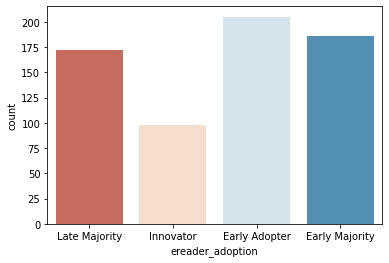

In [ ]:
sns.countplot(df2["ereader_adoption"], palette = "RdBu") 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


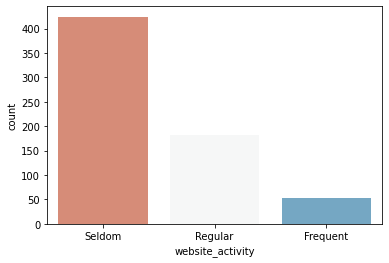

In [ ]:
sns.countplot(df2["website_activity"], palette = "RdBu") 

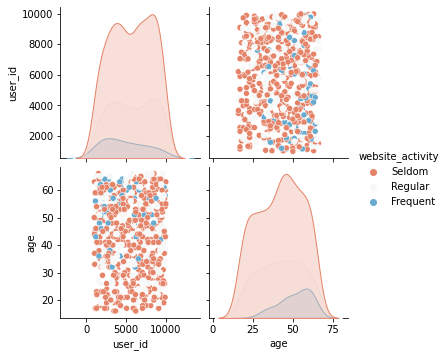

In [ ]:
cols1 = ['user_id', 'gender', 'age', 'marital_status', 'website_activity',
       'browsed_electronics_12mo', 'bought_electronics_12mo',
       'bought_digital_media_18mo', 'bought_digital_books', 'payment_method',
       'ereader_adoption']

sns.pairplot(data = df2[cols1], hue = "website_activity", palette = "RdBu")

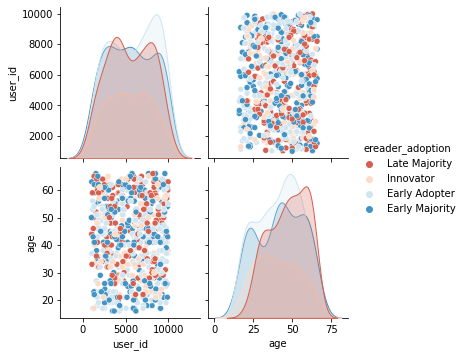

In [ ]:
cols1 = ['user_id', 'gender', 'age', 'marital_status', 'website_activity',
       'browsed_electronics_12mo', 'bought_electronics_12mo',
       'bought_digital_media_18mo', 'bought_digital_books', 'payment_method',
       'ereader_adoption']

sns.pairplot(data = df2[cols1], hue = "ereader_adoption", palette = "RdBu")

## Data Preparation

In [ ]:
df1.head()

,user_id,gender,age,marital_status,website_activity,browsed_electronics_12mo,bought_electronics_12mo,bought_digital_media_18mo,bought_digital_books,payment_method
0,56031,M,57,S,Regular,Yes,Yes,Yes,Yes,Bank Transfer
1,25913,F,51,M,Regular,Yes,Yes,No,No,Bank Transfer
2,19396,M,41,M,Seldom,Yes,Yes,Yes,No,Website Account
3,93666,M,66,S,Regular,Yes,Yes,Yes,Yes,Credit Card
4,72282,F,31,S,Seldom,Yes,No,Yes,No,Website Account


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    473 non-null    int64 
 1   gender                     473 non-null    object
 2   age                        473 non-null    int64 
 3   marital_status             473 non-null    object
 4   website_activity           473 non-null    object
 5   browsed_electronics_12mo   473 non-null    object
 6   bought_electronics_12mo    473 non-null    object
 7   bought_digital_media_18mo  473 non-null    object
 8   bought_digital_books       473 non-null    object
 9   payment_method             473 non-null    object
dtypes: int64(2), object(8)
memory usage: 37.1+ KB


In [ ]:
df2.head()

,user_id,gender,age,marital_status,website_activity,browsed_electronics_12mo,bought_electronics_12mo,bought_digital_media_18mo,bought_digital_books,payment_method,ereader_adoption
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    661 non-null    int64 
 1   gender                     661 non-null    object
 2   age                        661 non-null    int64 
 3   marital_status             661 non-null    object
 4   website_activity           661 non-null    object
 5   browsed_electronics_12mo   661 non-null    object
 6   bought_electronics_12mo    661 non-null    object
 7   bought_digital_media_18mo  661 non-null    object
 8   bought_digital_books       661 non-null    object
 9   payment_method             661 non-null    object
 10  ereader_adoption           661 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB


In [ ]:
df1.shape

(473, 10)

In [ ]:
df2.shape

(661, 11)

In [ ]:
cols_new = ['user_id', 'marital_status', 'website_activity',
       'browsed_electronics_12mo', 'bought_electronics_12mo',
       'bought_digital_media_18mo', 'bought_digital_books', 'payment_method',
       'ereader_adoption']

In [ ]:
df2_new = df2[cols_new]
df2_new.head()

,user_id,marital_status,website_activity,browsed_electronics_12mo,bought_electronics_12mo,bought_digital_media_18mo,bought_digital_books,payment_method,ereader_adoption
0,9552,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [ ]:
X = df2_new.copy()
X.drop("ereader_adoption", axis=1, inplace=True)
X = X.values
X

array([[9552, 'M', 'Seldom', ..., 'Yes', 'No', 'Bank Transfer'],
       [6757, 'M', 'Regular', ..., 'Yes', 'No', 'Bank Transfer'],
       [3599, 'M', 'Seldom', ..., 'Yes', 'Yes', 'Bank Transfer'],
       ...,
       [9630, 'M', 'Seldom', ..., 'Yes', 'Yes', 'Website Account'],
       [9982, 'S', 'Seldom', ..., 'Yes', 'No', 'Monthly Billing'],
       [2542, 'S', 'Regular', ..., 'Yes', 'Yes', 'Bank Transfer']],
      dtype=object)

In [ ]:
l1=['aa','bb','cc','dd']
enum=enumerate(l1)
enum

In [ ]:
d=dict((j,i) for i,j in enum)
d

{'aa': 0, 'bb': 1, 'cc': 2, 'dd': 3}

In [ ]:
def convert_cat(df2,col):
    """
    input: dataframe and col list of categorical columns
    output: dataframw with numerical values
    """
    for c in col:
        item_list = df2[c].unique().tolist()
        enum=enumerate(item_list)
        d = dict((j,i) for i,j in enum)
        print(c)
        print(d)
        
        df2[c].replace(d, inplace=True)
    return df2

In [ ]:
convert_cat(df2, cols_new)

user_id
{9552: 0, 6757: 1, 3599: 2, 6811: 3, 4104: 4, 7226: 5, 7814: 6, 4693: 7, 7266: 8, 5259: 9, 7417: 10, 6795: 11, 8669: 12, 9888: 13, 9181: 14, 2792: 15, 5174: 16, 8702: 17, 4318: 18, 6091: 19, 8380: 20, 6892: 21, 7976: 22, 7214: 23, 3369: 24, 1645: 25, 2866: 26, 7014: 27, 6177: 28, 6199: 29, 4787: 30, 1720: 31, 7763: 32, 7356: 33, 6916: 34, 2979: 35, 1328: 36, 7817: 37, 4937: 38, 3879: 39, 1757: 40, 9651: 41, 8096: 42, 5575: 43, 7793: 44, 4423: 45, 7117: 46, 6974: 47, 5928: 48, 6415: 49, 3505: 50, 5108: 51, 9895: 52, 2670: 53, 8231: 54, 5429: 55, 8951: 56, 7488: 57, 3514: 58, 4303: 59, 9547: 60, 5666: 61, 3960: 62, 4177: 63, 4838: 64, 9939: 65, 2586: 66, 7688: 67, 3243: 68, 1153: 69, 1596: 70, 6775: 71, 5524: 72, 9092: 73, 4850: 74, 9058: 75, 4766: 76, 3170: 77, 1858: 78, 9327: 79, 9252: 80, 5071: 81, 7333: 82, 8184: 83, 4148: 84, 8747: 85, 9201: 86, 7500: 87, 8666: 88, 6498: 89, 6014: 90, 3377: 91, 7464: 92, 8105: 93, 8524: 94, 8653: 95, 2428: 96, 4150: 97, 1798: 98, 6210: 99, 5

,user_id,gender,age,marital_status,website_activity,browsed_electronics_12mo,bought_electronics_12mo,bought_digital_media_18mo,bought_digital_books,payment_method,ereader_adoption
0,0,M,61,0,0,0,0,0,0,0,0
1,1,M,27,0,1,0,1,0,0,0,1
2,2,F,29,0,0,0,0,0,1,0,2
3,3,M,49,0,0,0,0,0,1,1,2
4,4,M,29,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
656,631,M,48,1,2,0,0,0,1,1,0
657,632,F,32,0,1,0,1,0,0,1,2
658,633,F,26,0,0,0,1,0,1,1,3
659,634,F,55,1,0,0,1,0,0,3,2


In [ ]:
X = df2[['user_id','marital_status', 'website_activity',
       'browsed_electronics_12mo', 'bought_electronics_12mo',
       'bought_digital_media_18mo', 'bought_digital_books', 'payment_method']]
Y = df2[['ereader_adoption']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train

,user_id,marital_status,website_activity,browsed_electronics_12mo,bought_electronics_12mo,bought_digital_media_18mo,bought_digital_books,payment_method
399,392,0,0,0,0,0,0,0
278,276,1,1,0,1,0,1,0
653,628,1,1,0,1,0,1,0
618,451,0,1,0,0,0,1,0
479,466,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...
9,9,1,0,0,0,0,0,1
359,354,1,0,0,0,0,0,3
192,192,0,0,0,1,0,1,0
629,606,0,1,0,0,0,0,2


## Modeling & Evaluation

#### Decision Tree Regressor

In [ ]:
df2.head(5)

,user_id,gender,age,marital_status,website_activity,browsed_electronics_12mo,bought_electronics_12mo,bought_digital_media_18mo,bought_digital_books,payment_method,ereader_adoption
0,0,M,61,0,0,0,0,0,0,0,0
1,1,M,27,0,1,0,1,0,0,0,1
2,2,F,29,0,0,0,0,0,1,0,2
3,3,M,49,0,0,0,0,0,1,1,2
4,4,M,29,1,0,0,0,0,0,1,0


In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        self.value = value

In [ ]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        
        self.root = None
        
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            
            best_split = self.get_best_split(dataset, num_samples, num_features)
            
            if best_split["var_red"]>0:
                
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        
        leaf_value = self.calculate_leaf_value(Y)
        
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        
        best_split = {}
        max_var_red = -float("inf")
        
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            for threshold in possible_thresholds:
                
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

In [ ]:
X = df2.iloc[:, :-1].values
Y = df2.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [ ]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)

In [ ]:

regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train, Y_train)
regressor.print_tree()


X_8 <= 0 ? 0.0904490811891856
 left:X_4 <= 0 ? 0.2185824437176105
  left:X_2 <= 25 ? 0.49571222626388156
    left:X_0 <= 522 ? 0.7099489795918369
        left:3.0
        right:0.8
    right:X_0 <= 523 ? 0.2229154352919478
        left:0.46153846153846156
        right:1.7826086956521738
  right:X_0 <= 529 ? 0.10287528288486236
    left:X_2 <= 38 ? 0.13136013997766738
        left:1.6388888888888888
        right:2.3773584905660377
    right:X_0 <= 613 ? 0.35416666666666674
        left:1.0
        right:2.6666666666666665
 right:X_4 <= 0 ? 0.09925891925397534
  left:X_2 <= 63 ? 0.05524475585441169
    left:X_0 <= 503 ? 0.04937857556315728
        left:2.3114754098360657
        right:1.72
    right:X_2 <= 64 ? 2.0
        left:0.0
        right:3.0
  right:X_0 <= 575 ? 0.13176931949250287
    left:X_2 <= 52 ? 0.05205917236884955
        left:1.1818181818181819
        right:1.6451612903225807
    right:X_2 <= 56 ? 0.0625
        left:2.375
        right:3.0


In [ ]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import numpy as np

Y_pred = regressor.predict(X_test) 

mse = mean_squared_error(Y_pred, Y_test)
rmse = np.sqrt(mse)
r, _ = pearsonr(Y_pred, Y_test)

print("=== * ===")
print("Root Mean Squared Error (RMSE) = " + str(rmse))
print("Pearson's Correlation Coefficient = " + str(r))

=== * ===
Root Mean Squared Error (RMSE) = 0.9752298681728333
Pearson's Correlation Coefficient = [0.586220626137972]


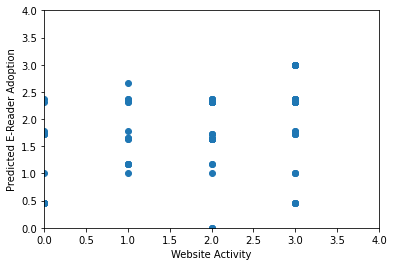

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Website Activity")
plt.ylabel("Predicted E-Reader Adoption")
plt.axis([0, 4, 0, 4])
plt.show()